## Import Lib

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Load Data

In [72]:
df = pd.read_csv('telco_data_raw.csv', index_col=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check Duplicate

In [73]:
df.duplicated().sum()

0

## Check Null Values

In [74]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [76]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [78]:
df.rename(columns={'customerID':'customer_id', 
                   'SeniorCitizen':'senior_citizen', 
                   'PhoneService':'phone_service',
                   'MultipleLines':'multiple_lines', 
                   'InternetService':'internet_service',
                   'OnlineSecurity':'online_security', 
                   'OnlineBackup':'online_backup',
                   'DeviceProtection':'device_protection',
                   'TechSupport':'tech_support',
                   'StreamingTV':'streaming_tv', 
                   'StreamingMovies':'streaming_movies',
                   'PaperlessBilling':'paperless_billing', 
                   'PaymentMethod':'payment_method',
                   'MonthlyCharges':'monthly_charges', 
                   'TotalCharges':'total_charges'
                   }, inplace=True)
df.columns = df.columns.str.lower()


In [79]:
df.drop(['customer_id'], axis = 1, inplace=True)

In [80]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [81]:
# Remove Tenure 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [82]:
# df['TotalCharges'] = df['TotalCharges'].str.replace(' ','0')
df['total_charges'] = df['total_charges'].astype(float)

In [83]:
df["senior_citizen"]= df["senior_citizen"].map({0: "No", 1: "Yes"})

In [84]:
#Function to define cholesterol level
def monthlyChargesCat(row):
   if row['monthly_charges'] <= 30:
      return 'Low Expense'
   elif row['monthly_charges'] <= 60:
      return 'Medium Expense'
   elif row['monthly_charges'] <= 90:
      return 'Medium High Expense'
   else:
      return 'High Expense'

In [85]:
#Function to define cholesterol level
def tenureCat(row):
   if row['tenure'] <= 12:
      return 1
   elif row['tenure'] <= 24:
      return 2
   elif row['tenure'] <= 36:
      return 3
   elif row['tenure'] <= 48:
      return 4
   elif row['tenure'] <= 60:
      return 5
   else:
      return 6

In [86]:
df['monthly_charges_cat'] = df.apply(lambda row: monthlyChargesCat(row), axis=1)
df['tenure_year'] = df.apply(lambda row: tenureCat(row), axis=1)

In [87]:
df.describe()

,tenure,monthly_charges,total_charges,tenure_year
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,3.181030
std,24.545260,30.085974,2266.771362,1.932091
min,1.000000,18.250000,18.800000,1.000000
25%,9.000000,35.587500,401.450000,1.000000
50%,29.000000,70.350000,1397.475000,3.000000
75%,55.000000,89.862500,3794.737500,5.000000
max,72.000000,118.750000,8684.800000,6.000000


In [88]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Expense,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium Expense,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium Expense,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Medium High Expense,2
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,High Expense,6
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Low Expense,1
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Medium High Expense,1


In [89]:
def exploreNumCol(df,  col):
    mean = df[col].mean()
    median = df[col].median()
    modus = df[col].mode().values[0]

    min = df[col].min()
    max = df[col].max()

    print(f'Mean {col} = {mean:.2f}')
    print(f'Median {col} = {median}')
    print(f'Modus {col} = {modus}')
    print(f'Min {col} = {min}')
    print(f'Max {col} = {max}')

    skew = df[col].skew()
    if skew < 0.5:
        print(f'Skewness {col} = {skew}, data distribution is normal')
    else:
        print(f'Skewness {col} = {skew}, data distribution is not normal')

In [90]:
numCol = ['tenure',	'monthly_charges',	'total_charges']
for nCol in numCol:
    exploreNumCol(df, nCol)
    print('')

Mean tenure = 32.42
Median tenure = 29.0
Modus tenure = 1
Min tenure = 1
Max tenure = 72
Skewness tenure = 0.23773083190513133, data distribution is normal

Mean monthly_charges = 64.80
Median monthly_charges = 70.35
Modus monthly_charges = 20.05
Min monthly_charges = 18.25
Max monthly_charges = 118.75
Skewness monthly_charges = -0.22210292770166232, data distribution is normal

Mean total_charges = 2283.30
Median total_charges = 1397.475
Modus total_charges = 20.2
Min total_charges = 18.8
Max total_charges = 8684.8
Skewness total_charges = 0.9616424997242504, data distribution is not normal



In [91]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30) if variable is None else sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df) if variable is None else sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

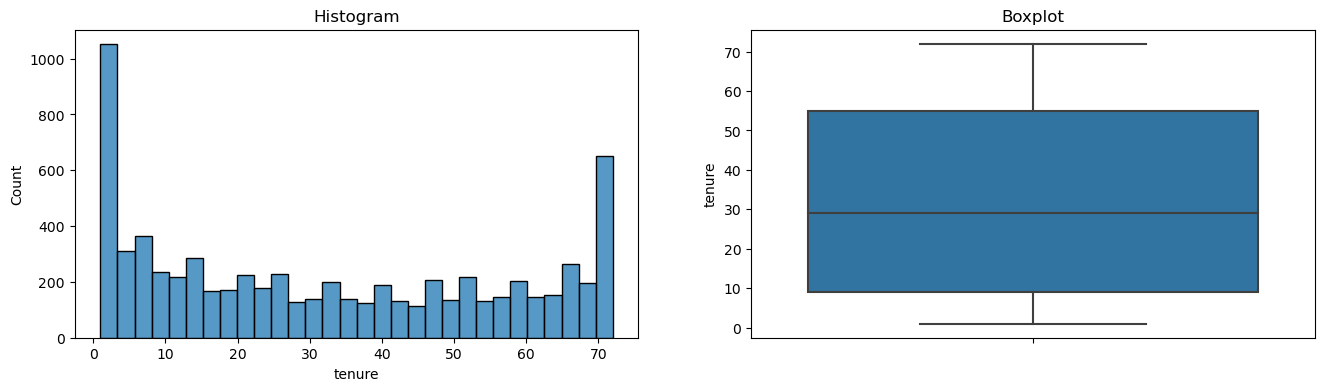

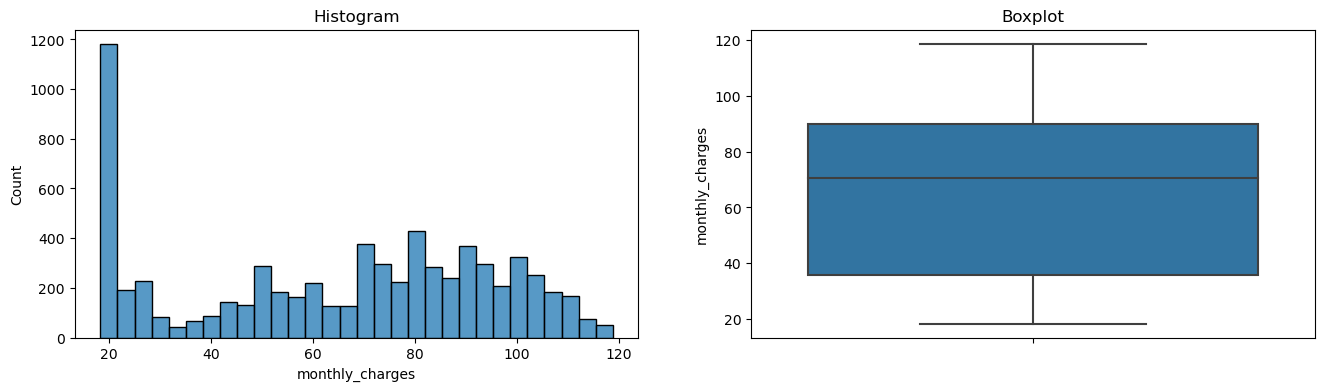

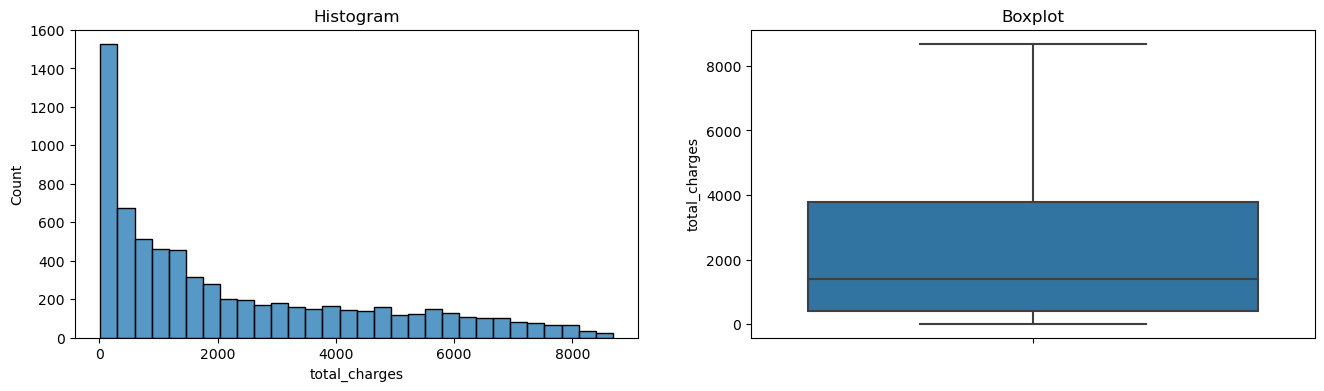

In [92]:
numCol = ['tenure',	'monthly_charges',	'total_charges']
for nCol in numCol:
    diagnostic_plots(df, nCol)

In [2]:
df.to_csv('telco_data_clean.csv', index=False)

NameError: name 'df' is not defined

In [ ]:
# def formatHeader(row):
#     print(re.findall('[A-Z][^A-Z]*', row))
#     return(row.upper())
#     # x.strip().replace(' ', '_').lower()

In [ ]:
# # df['flight_status'] = df.apply(lambda row: formatHeader(row), axis=1)
# df.rename(columns=lambda x: formatHeader(x), inplace=True)

In [7]:
df_clean = pd.read_csv('telco_data_clean.csv', index_col=False)
df_sample = df_clean.sample(n=50, random_state=44) #14
# name = ['Aditya Jusuf', 'Yuliana Rahma', 'Hadi Faisal', 'Edi Burhanuddin', 'Vina Trianna', 'Irfan Agung', 'Dwi Purnama', 'Siti Aisyah', 'Putri Widya', 'Annisa Kinasih']
# df_sample.insert(0, 'name', name)
df_sample.index.names = ['name']
df_sample = df_sample.sort_values(by=['gender'], ascending=False).reset_index()

In [8]:
df_sample.drop('churn', axis=1, inplace=True)
# df_sample.to_excel("telco_data_test_01.xlsx", index=False)

In [9]:
df_name = pd.read_excel("telco_data_test.xlsx", index_col=False)
list_name = df_name['name'].to_list()
df_sample['name'] = list_name
df_sample.to_csv("telco_data_test.csv", index=False)

In [10]:
df_clean.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'monthly_charges_cat', 'tenure_year'],
      dtype='object')

In [11]:
df_clean['paperless_billing'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# saveas = pd.read_csv('telco_data_test.csv', index_col=False)
# saveas.to_excel('telco_data_test.xlsx', index=False)

In [13]:
df_cbyt = df_clean.groupby(['tenure_year', 'churn']).agg(total=('churn', 'count'))#.sort_values(by=['total'], ascending=True)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

[Text(0.5, 1.0, 'Churn by Monthly Charges')]

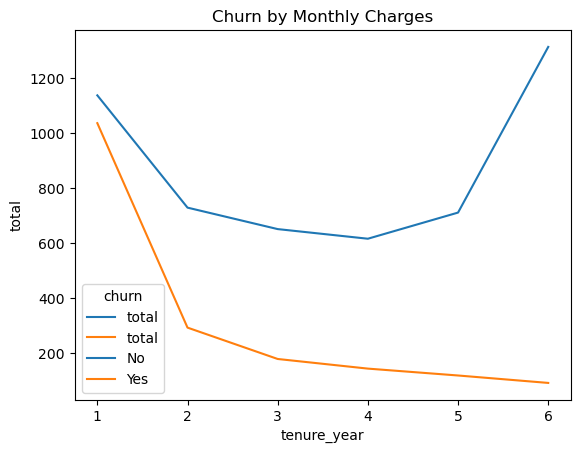

In [14]:
ax = sns.lineplot(data=df_cbyt, x="tenure_year", y="total", hue="churn", label="total")
# ax.bar_label(ax.containers[0])
ax.set(title='Churn by Monthly Charges')

In [15]:
target = df_clean["churn"].value_counts().reset_index()
target
# persen = df["churn"].value_counts(normalize=True).reset_index()

,churn,count
0,No,5163
1,Yes,1869


In [16]:
target = df_clean.groupby(['churn']).agg(total_churn=('churn', 'count'))
target['percentage'] = (target['total_churn'] / target['total_churn'].sum())
target.reset_index()

,churn,total_churn,percentage
0,No,5163,0.734215
1,Yes,1869,0.265785


In [71]:
target = df_clean.groupby(['churn']).agg(total_churn=('churn', 'count'))
gender = df_clean.groupby(['gender']).agg(total_gender=('gender', 'count'))

Text(0.5, 1.0, 'Customer Gender')

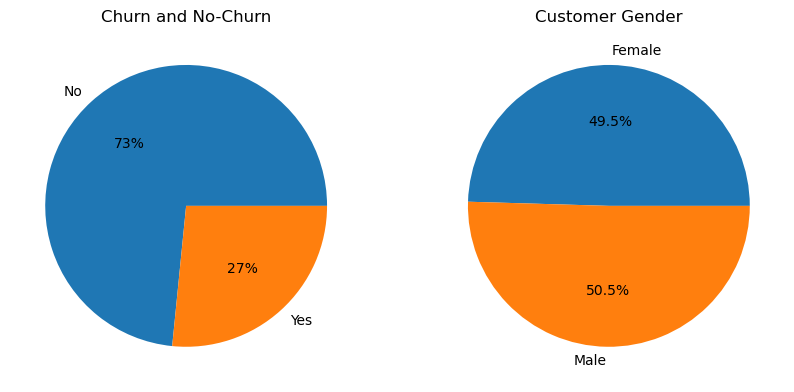

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].pie(target["total_churn"], labels=target["total_churn"].index, autopct='%.0f%%')
ax[0].set_title("Churn and No-Churn")

ax[1].pie(gender["total_gender"], labels=gender["total_gender"].index, autopct='%.1f%%')
ax[1].set_title("Customer Gender")
